# HW 2
## Author : Jaskaran Singh Kohli

## Use AAPL.csv file and answer the following questions:

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [22]:
data.head()

Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.407747  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.386473   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.358108   26432000.0
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366972   21610400.0
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.377609   18362400.0

## Q1

### Q1.1, How many trading days this data set cover? (fill in the number in Camino)

In [244]:
len(data)

9859

### Q1.2, What's the open price at 2015-07-01? (choose the closest price in Camino)

In [29]:
stock_o['2015-07-01']

126.900002

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)? (choose the closest price in Camino)

In [32]:
stock_c['2018-01-01' : '2018-03-31'].mean()

172.1913116557377

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top. (choose the 1st date in Camino)

In [247]:
(stock_h-stock_l).nlargest(5)

Date
2015-08-24    16.800003
2018-10-29    13.600006
2019-10-31    11.910003
2019-08-13    11.660003
2019-08-01    11.289994
dtype: float64

In [248]:
(stock_h-stock_l).nlargest(5).index[0]

Timestamp('2015-08-24 00:00:00')

### Q1.5, Plot the closing price vs date graph. (pick the command that you use to plot the graph in Camino, exclude the %pylab inline)

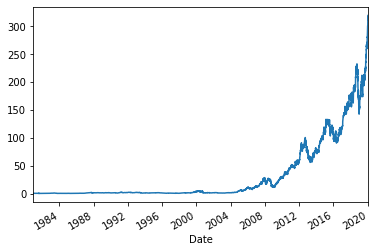

In [36]:
stock_c.plot()

## Q2

### Q2.1, Total how many trading days the stock price close at below 50 dollars ? (fill in the number in Camino)

In [53]:
len(stock_c[stock_c < 50])

7682

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only. (choose the right date in Camino)

In [65]:
stock_c[stock_c > 50].head(1)

Date
2011-02-07    50.26857
Name: Close, dtype: float64

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares. (choose the right number in Camino)

In [89]:
len(data[(data['Close']>50) & (data['Volume']>100000000)])


404

## Q3

### Q3.1, For dates with price close at more than 100 dollars, how many days are before 2014-01-01 ? Show the date and stock price.  (choose the number of days in Camino)

In [159]:
Date_of_Stocks = (stock_c[stock_c > 100].loc[:'2014-01-01'])

len(Date_of_Stock)


3

In [160]:
Date_of_Stocks

Date
2012-09-18    100.272858
2012-09-19    100.300003
2012-09-21    100.012856
Name: Close, dtype: float64

### Q3.2, Show the top 5 trading volume(date and volume) for stock price over 100 dollars. (choose the largest volume date in Camino)

In [249]:
data[stock_c>100].sort_values(by = 'Volume',ascending = False).head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-08-24   94.870003  108.800003   92.000000  103.120003   95.952095   
2015-01-28  117.629997  118.120003  115.309998  115.309998  105.948822   
2012-09-21  100.344284  100.724289   99.908569  100.012856   87.394920   
2015-08-21  110.430000  111.900002  105.650002  105.760002   98.408554   
2015-08-04  117.419998  117.699997  113.250000  114.639999  106.190651   

                 Volume  
Date                     
2015-08-24  162206300.0  
2015-01-28  146477100.0  
2012-09-21  142897300.0  
2015-08-21  128275500.0  
2015-08-04  124138600.0

In [201]:
data[stock_c>100].sort_values(by = 'Volume',ascending = False).head(1).index

DatetimeIndex(['2015-08-24'], dtype='datetime64[ns]', name='Date', freq=None)

### Q3.3, Based on top 5 trading volume dates for stock price over 100 dollars, find the matching closing price and sort them based on price, highest one on top. (choose the first date in Camino)

In [204]:
data[stock_c>100].sort_values(by = 'Volume',ascending = False).head(5)['Close'].sort_values(ascending= False)

Date
2015-01-28    115.309998
2015-08-04    114.639999
2015-08-21    105.760002
2015-08-24    103.120003
2012-09-21    100.012856
Name: Close, dtype: float64

In [250]:
data[stock_c>100].sort_values(by = 'Volume',ascending = False).head(5)['Close'].sort_values(ascending= False).index[0]

Timestamp('2015-01-28 00:00:00')

### Q3.4, Based on top 5 trading volume dates for stock price over 100 dollars, which date it lost the most per share? (choose the date in Camino)

In [241]:
Stock_Price = data[stock_c>100].sort_values(by = 'Volume',ascending = False).head(5)
Lost = Stock_Price['Open']-Stock_Price['Close'].nlargest()
Lost

Date
2012-09-21    0.331428
2015-01-28    2.319999
2015-08-04    2.779999
2015-08-21    4.669998
2015-08-24   -8.250000
dtype: float64

In [242]:
Lost.sort_values(ascending = False).index[0]

Timestamp('2015-08-21 00:00:00')